# Matlab for Signals and systems - Exam 01/2022

A musical note has been recorded at a sampling frequency Fs1. The signal being heavy because of the number of samples contained, we decided to lighten it by keeping only one sample out of 10 of the original signal, and this over the whole duration of the signal.

In the file `Data_signal_2.npz`, we provide :

- The frequency content of signal 1 corresponding to the recorded musical note: (vector Amp1) as a function of the frequency (vector f1) 
- The amplitude of the signal of this musical note (vector y2) as a function of time (vector t2) of which we have kept only 10% of the samples (called "signal 2" in the whole statement).
- A third time signal which will be discussed later in this statement (y3 and t3)

You are asked to:

1) Visualize the signal sampled at the frequency Fs2 as a function of time (signal 2). Then determine the frequency (Fs2) and the sampling period (Ts2). Deduce the sampling frequency Fs1.

In [2]:
import numpy as np

content = np.load('./Data_Signal_2.npz')
content

NpzFile './Data_Signal_2.npz' with keys: Amp1, f1, t2, t3, y2...

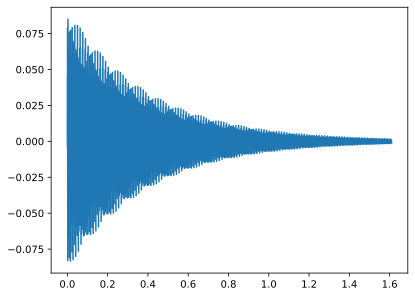

In [3]:
Amp1 = content['Amp1']
f1 = content['f1']
t2 = content['t2']
y2 = content['y2']
t3 = content['t3']
y3 = content['y3']

from matplotlib import pyplot as plt

# better plots in jupyter
%config InlineBackend.figure_formats = ['svg']

plt.plot(t2, y2)
plt.show()

In [4]:
from scipy.stats import mode

Ts2 = mode(np.diff(t2)).mode
print('Ts2 =', Ts2)

Fs2 = 1 / Ts2
print('Fs2 =', Fs2)

Fs1 = 10 * Fs2
print('Fs1 =', Fs1)

Ts2 = 0.00022675736961452753
Fs2 = 4409.999999999707
Fs1 = 44099.999999997075


2) Below is a piece of code applying the FFT on the signal 2. Correct the code provided by justifying the corrections performed.

We want to have a frequency resolution of 38Hz.

Here is the code provided to be corrected in the following code editing space:

```python
import numpy as np
from matplotlib import pyplot as plt
import math

dF = 38
N = math.floor(dF / Fs2)
X = np.fft.fft(y2)
Amp2 = np.abs(X)
Amp2 = Amp2[:N//2] * 2
n = np.arange(1, len(Amp))
f2 = n * dF
plt.stem(f2,Amp2)
plt.show()
```

Write the corrected code of the FFT on this signal.

N = 116


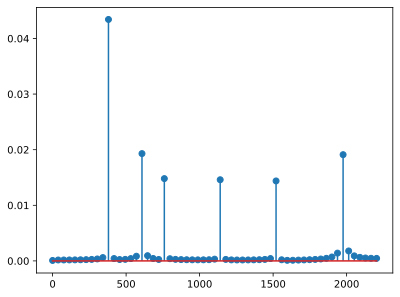

In [5]:
import math
dF = 38
N = math.floor(Fs2/dF)
print('N =', N)

X = np.fft.fft(y2[:N])
Amp2 = np.abs(X) / N

Amp2 = Amp2[:N//2 + 1] * 2
Amp2[0] = Amp2[0] / 2

n = np.arange(len(Amp2))
f2 = n * dF
plt.stem(f2,Amp2)
plt.show()

If you display it, you should get this spectrum (not requested, this figure is there so you can check the intermediate result): 

![](./2_2_2.svg)

You are then asked to clean up this frequency spectrum by removing all the components of amplitude<0.005. Then do the same operation on `Amp1` and `f1`.

In [6]:
f2 = f2[Amp2>0.005]
print(f2)

Amp2 = Amp2[Amp2>0.005]
 
f1 = f1[Amp1>0.005]
print(f1)

Amp1 = Amp1[Amp1>0.005]

[ 380  608  760 1140 1520 1976]
[ 380  760 1140 1520 3800 6840]


Then compare (by superimposing them on the same graph) the frequency spectrum obtained (`Amp2`) with the frequency spectrum provided (`Amp1`) of the signal sampled at `Fs1`. Visualize the whole for a frequency ranging from 0 to 10000 Hz.

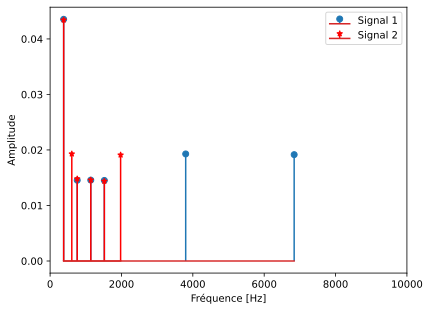

In [7]:
plt.stem(f1, Amp1, markerfmt='o', label="Signal 1")
plt.stem(f2, Amp2, 'r', markerfmt='*', label="Signal 2")
plt.legend()
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.xlim([0, 10000])
plt.show()

Expected result :

![](./2_2_2_2.svg)

Explain why the two frequency spectra do not have all lines at the same frequency.

Also justify the frequencies at which new lines appear on the spectrum of signal 2.

3) Create a low-pass filter

    Its transfer function is: $H(s) = \frac{1}{\frac{s^2}{\omega_c^2} + \frac{2s\xi}{\omega_c} + 1}$ with $\omega_c = 13162$ rad/s and $\xi = 0.65$.

In [8]:
import control as ct

s = ct.tf('s')
wc = 13162
Ksi = 0.65
H = 1 / ((s**2)/wc**2 + 2*s*Ksi/wc + 1)
H.name = "Low-pass Filter"
print(H)

<TransferFunction>: Low-pass Filter
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                 2.28e+12
  --------------------------------------
  1.316e+04 s^2 + 2.252e+08 s + 2.28e+12


If we apply the signal `y1` (sampled at the frequency `Fs1`) to the input of this filter, we would obtain a filtered output signal sampled at the same frequency as the input signal `Fs1`. This output signal of the filter has been reduced (by keeping only one sample every 10 samples), and we give you the result `(y3, t3)`.

4) Apply the FFT on the filtered signal (`y3` and `t3`), always trying to have a frequency resolution of 38 Hz. Be sure to keep only the components with amplitudes >0.00125 for this spectrum of the filtered signal.

N = 116


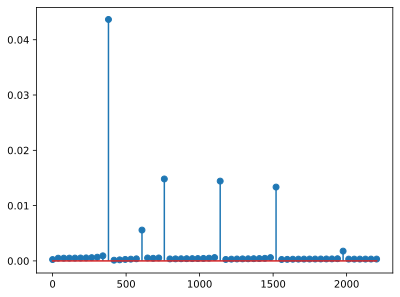

In [9]:
dF = 38
N = math.floor(Fs2/dF)
print('N =', N)

X = np.fft.fft(y3[:N])
Amp3 = np.abs(X) / N

Amp3 = Amp3[:N//2 + 1] * 2
Amp3[0] = Amp3[0] / 2

n = np.arange(len(Amp3))
f3 = n * dF
plt.stem(f3,Amp3)
plt.show()

In [10]:
f3 = f3[Amp3 > 0.00125]
Amp3 = Amp3[Amp3 > 0.00125]

Then compare (by superimposing them on the same graph) the frequency spectrum of the filtered signal whose size has been reduced by keeping only one sample every 10 (Amp3) with the frequency spectrum of the original unfiltered and complete signal (Amp1). Visualize the whole for a frequency ranging from 0 to 10000 Hz.

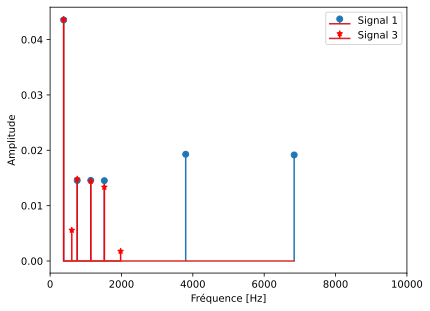

In [11]:
plt.stem(f1, Amp1, markerfmt='o', label='Signal 1')
plt.stem(f3, Amp3, 'r', markerfmt='*', label= 'Signal 3')
plt.legend()
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.xlim([0, 10000])
plt.show()


Expected result : 

![](./2_2_4.svg)

Justify the relevance of the filter used with the help of the frequency contents of the 2 signals.

5) Represent the experimental gain observed on this filter (the ratio between the amplitudes of the frequency components at the output and at the input), expressed in dB ($20 \cdot \log_{10}$), on a semi-logarithmic frequency scale. Initially, only the frequencies for which there are components in the 2 spectra obtained are concerned. Then superimpose, on this representation, the Bode diagram of the filter in question.

    Note that your code can be specific to this exercise depending on the frequencies present in the spectra; you are not asked to propose a generic code that can handle all conceivable cases for this sub-question.

[ 0.02575693  0.16329353 -0.08189275 -0.72424692]


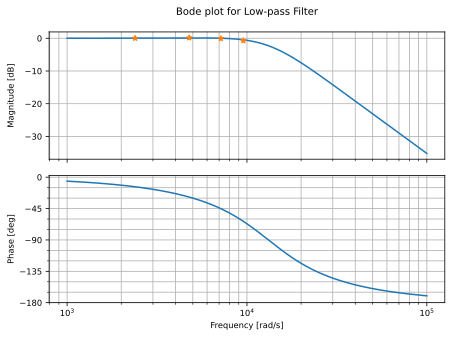

In [12]:
Gain = 20 * np.log10([Amp3[0]/Amp1[0], Amp3[2]/Amp1[1], Amp3[3]/Amp1[2], Amp3[4]/Amp1[3]])
print(Gain)

w = 2 * np.pi * f1[0:4]
ct.bode(H, dB = True)
plt.subplot(2, 1, 1)
plt.plot(w, Gain, '*')
plt.show()

Expected result :

![](./2_2_5.svg)

6) Now add on this Bode diagram the two missing lines (those which are not at the same frequencies on the 2 spectra) by choosing the correct frequency for each line.

    Note that your code can be specific to this exercise depending on the frequencies present in the spectra; you are not asked to propose a generic code that can handle all conceivable cases for this sub-question.

[-10.77848362 -20.69037391]


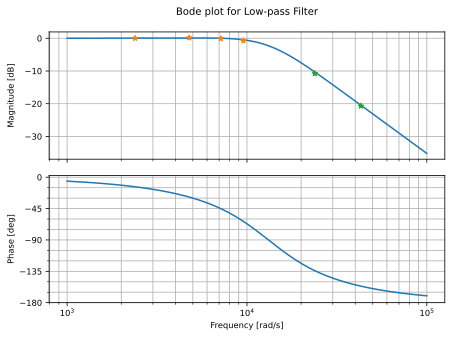

In [13]:
Gain2 = 20 * np.log10([Amp3[1]/Amp1[4], Amp3[5]/Amp1[5]])
print(Gain2)

w2 = 2 * np.pi * f1[4:6]
diag = ct.bode(H, dB = True)
plt.subplot(2, 1, 1)
plt.plot(w, Gain, '*')
plt.plot(w2, Gain2, '*')
plt.show()